<a href="https://colab.research.google.com/github/CalebMitchel/Imse-441/blob/main/HW_4Chapter_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statistics as stat
import math
from scipy.stats import ttest_1samp
from statsmodels.stats import weightstats as stests
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn import linear_model
from scipy.stats import t
from scipy.stats import ttest_ind
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Hw13#1.csv to Hw13#1.csv
User uploaded file "Hw13#1.csv" with length 261 bytes


In [3]:
import pandas as pd

df = pd.read_csv('Hw13#1.csv',sep = ',', na_values = ".")
df

,order,A,B,C,Totals
0,0,-1,-1,-1,221
1,1,1,-1,-1,325
2,2,-1,1,-1,354
3,3,1,1,-1,552
4,4,-1,-1,1,440
5,5,1,-1,1,406
6,6,-1,1,1,605
7,7,1,1,1,392
8,8,-1,-1,-1,311
9,9,1,-1,-1,435


In [12]:
A = df[['A']].to_numpy()
B = df[['B']].to_numpy()
C = df[['C']].to_numpy()

In [15]:
AB = A*B
df['AB'] = AB

In [16]:
AC = A*C
df['AC'] = AC

In [17]:
BC = C*B
df['BC'] = BC

In [18]:
ABC = A*B*C
df['ABC'] = ABC

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   order   16 non-null     int64
 1   A       16 non-null     int64
 2   B       16 non-null     int64
 3   C       16 non-null     int64
 4   Totals  16 non-null     int64
 5   AB      16 non-null     int64
 6   AC      16 non-null     int64
 7   BC      16 non-null     int64
 8   ABC     16 non-null     int64
dtypes: int64(9)
memory usage: 1.2 KB


In [21]:
import statsmodels.api as sm
X = df[['A','B','C','AB','AC','BC','ABC']]
X = sm.add_constant(X)
X

,const,A,B,C,AB,AC,BC,ABC
0,1.0,-1,-1,-1,1,1,1,-1
1,1.0,1,-1,-1,-1,-1,1,1
2,1.0,-1,1,-1,-1,1,-1,1
3,1.0,1,1,-1,1,-1,-1,-1
4,1.0,-1,-1,1,1,-1,-1,1
5,1.0,1,-1,1,-1,1,-1,-1
6,1.0,-1,1,1,-1,-1,1,-1
7,1.0,1,1,1,1,1,1,1
8,1.0,-1,-1,-1,1,1,1,-1
9,1.0,1,-1,-1,-1,-1,1,1


In [25]:
Y = df[['Totals',]]
Y

,Totals
0,221
1,325
2,354
3,552
4,440
5,406
6,605
7,392
8,311
9,435


In [26]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Totals   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     6.665
Date:                Wed, 11 Oct 2023   Prob (F-statistic):            0.00790
Time:                        05:52:35   Log-Likelihood:                -79.629
No. Observations:                  16   AIC:                             175.3
Df Residuals:                       8   BIC:                             181.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        413.1250     12.406     33.301      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [27]:
residual1 = res.resid
residual1

0    -45.0
1    -55.0
2      3.0
3     40.0
4     -6.5
5     14.5
6     52.5
7    -13.5
8     45.0
9     55.0
10    -3.0
11   -40.0
12     6.5
13   -14.5
14   -52.5
15    13.5
dtype: float64

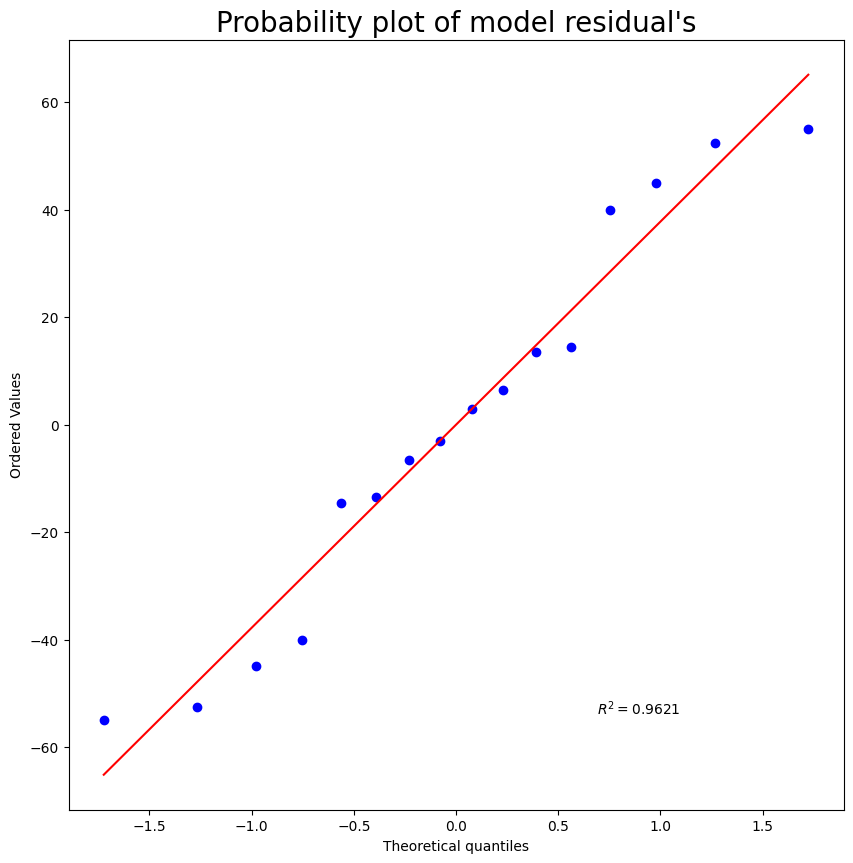

In [28]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [29]:
stats.levene(df['Totals'][df['A'] == -1],
             df['Totals'][df['A'] == 1])

LeveneResult(statistic=2.9911667871195697, pvalue=0.10569523307659201)

In [30]:
stats.levene(df['Totals'][df['B'] == -1],
             df['Totals'][df['B'] == 1])

LeveneResult(statistic=0.3721709444936149, pvalue=0.5515977352989001)

In [31]:
stats.levene(df['Totals'][df['C'] == -1],
             df['Totals'][df['C'] == 1])

LeveneResult(statistic=0.6509474436896675, pvalue=0.43326735432278096)

In [32]:
stats.levene(df['Totals'][df['AB'] == -1],
             df['Totals'][df['AB'] == 1])

LeveneResult(statistic=0.01357802057918744, pvalue=0.9088917080931298)

In [33]:
stats.levene(df['Totals'][df['BC'] == -1],
             df['Totals'][df['BC'] == 1])

LeveneResult(statistic=1.4669667552470307, pvalue=0.24587388037751523)

In [34]:
stats.levene(df['Totals'][df['ABC'] == -1],
             df['Totals'][df['ABC'] == 1])

LeveneResult(statistic=5.934828492253794, pvalue=0.028800646584476793)

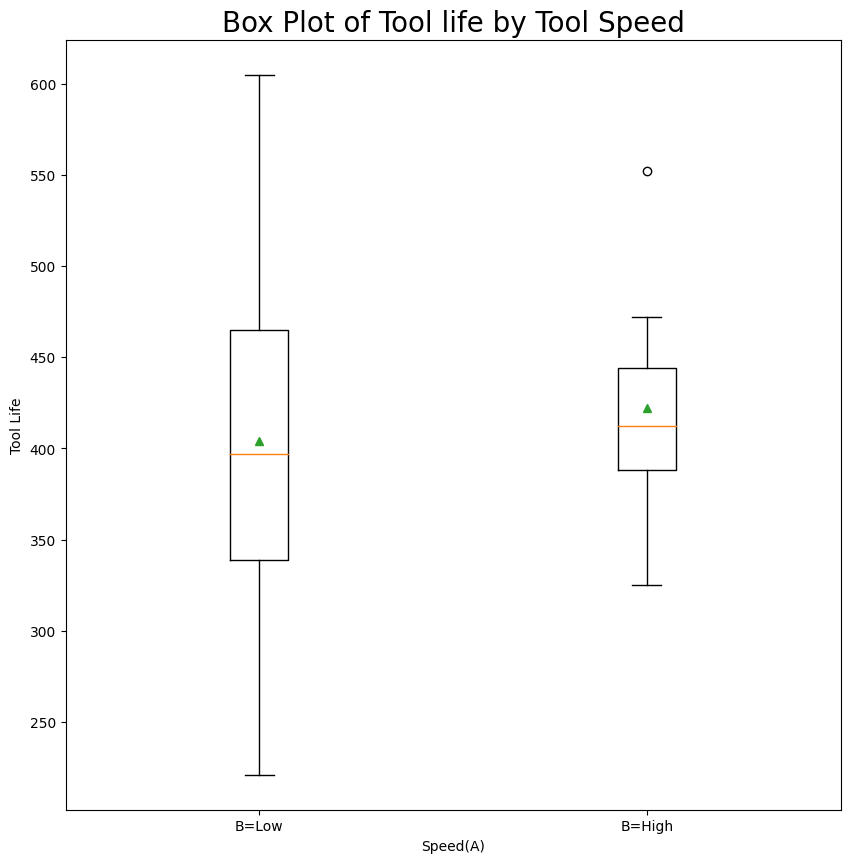

In [36]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Tool life by Tool Speed", fontsize= 20)
ax.set

data2 = [df['Totals'][df['A'] == -1],
         df['Totals'][df['A'] == +1]]


ax.boxplot(data2,
           labels= ['B=Low', 'B=High'],
           showmeans= True)

plt.xlabel("Speed(A)")
plt.ylabel("Tool Life")

plt.show()

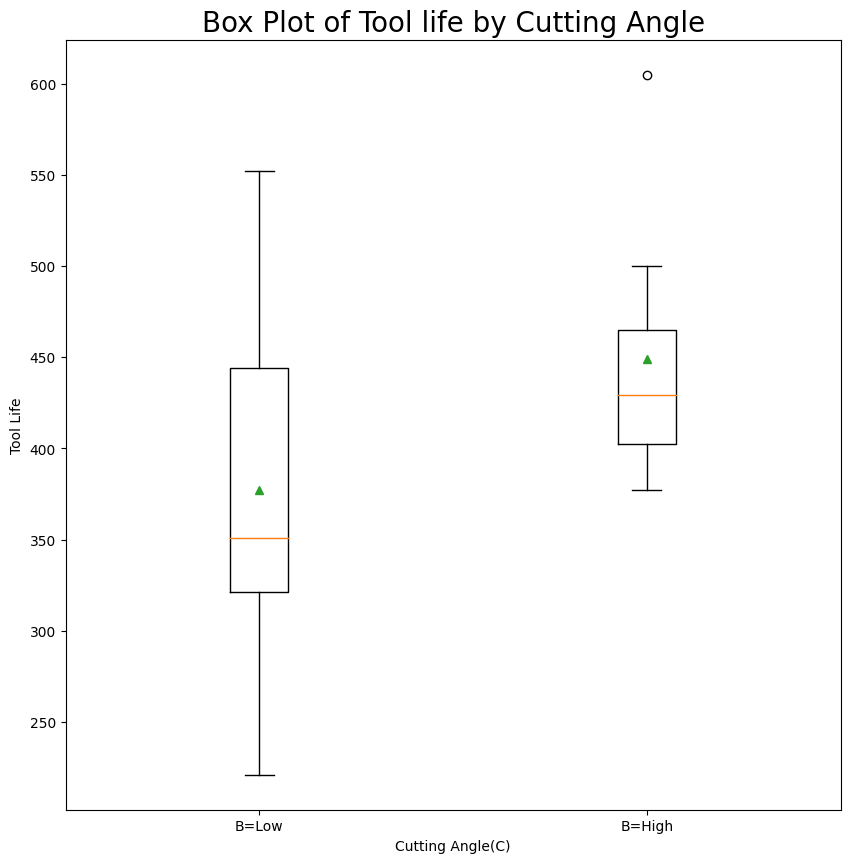

In [37]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Tool life by Cutting Angle", fontsize= 20)
ax.set

data2 = [df['Totals'][df['C'] == -1],
         df['Totals'][df['C'] == +1]]


ax.boxplot(data2,
           labels= ['B=Low', 'B=High'],
           showmeans= True)

plt.xlabel("Cutting Angle(C)")
plt.ylabel("Tool Life")

plt.show()

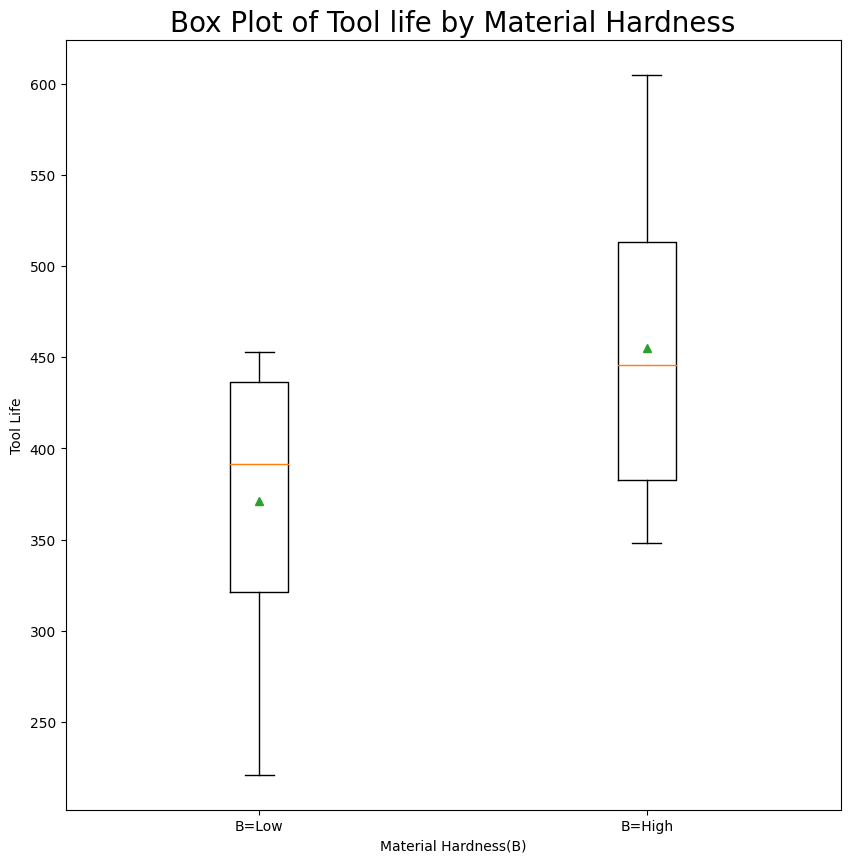

In [76]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Tool life by Material Hardness", fontsize= 20)
ax.set

data2 = [df['Totals'][df['B'] == -1],
         df['Totals'][df['B'] == +1]]


ax.boxplot(data2,
           labels= ['B=Low', 'B=High'],
           showmeans= True)

plt.xlabel("Material Hardness(B)")
plt.ylabel("Tool Life")

plt.show()

In [58]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving HW13#2_1.csv to HW13#2_1.csv
User uploaded file "HW13#2_1.csv" with length 604 bytes


In [59]:
import pandas as pd

df2 = pd.read_csv('HW13#2_1.csv',sep = ',', na_values = ".")
df2

,Factors,a,b,c,d,total
0,1,-1,-1,-1,-1,188
1,a,1,-1,-1,-1,172
2,b,-1,1,-1,-1,179
3,ab,1,1,-1,-1,185
4,c,-1,-1,1,-1,175
5,ac,1,-1,1,-1,183
6,bc,-1,1,1,-1,190
7,abc,1,1,1,-1,175
8,d,-1,-1,-1,1,200
9,ad,1,-1,-1,1,170


In [60]:
a = df2[['a']].to_numpy()
b = df2[['b']].to_numpy()
c = df2[['c']].to_numpy()
d = df2[['d']].to_numpy()

In [61]:
ab = a*b
df2['ab'] = ab

In [62]:
ac = a*c
df2['ac'] = ac

In [63]:
ad = a*d
df2['ad'] = ad

In [64]:
bc = b*c
df2['bc'] = bc

In [65]:
bd = b*d
df2['bd'] = bd

In [66]:
cd = c*d
df2['cd'] = cd

In [67]:
abc = a*b*c
df2['abc'] = abc

In [68]:
bcd = b*c*d
df2['bcd'] = bcd

In [69]:
abd = a*b*d
df2['abd'] = abd

In [70]:
abcd = a*b*c*d
df2['abcd'] = abcd

In [77]:
X = df2[['a',	'b',	'c', 'd', 'ab',	'ac',	'bc',	'abc', 'ad', 'bd', 'cd', 'abcd', 'bcd', 'abd']]
X= sm.add_constant(X)
X

,const,a,b,c,d,ab,ac,bc,abc,ad,bd,cd,abcd,bcd,abd
0,1.0,-1,-1,-1,-1,1,1,1,-1,1,1,1,1,-1,-1
1,1.0,1,-1,-1,-1,-1,-1,1,1,-1,1,1,-1,-1,1
2,1.0,-1,1,-1,-1,-1,1,-1,1,1,-1,1,-1,1,1
3,1.0,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,1,1,-1
4,1.0,-1,-1,1,-1,1,-1,-1,1,1,1,-1,-1,1,-1
5,1.0,1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,1,1
6,1.0,-1,1,1,-1,-1,-1,1,-1,1,-1,-1,1,-1,1
7,1.0,1,1,1,-1,1,1,1,1,-1,-1,-1,-1,-1,-1
8,1.0,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,1,1
9,1.0,1,-1,-1,1,-1,-1,1,1,1,-1,-1,1,1,-1


In [78]:
Y = df2[['total',]]
Y

,total
0,188
1,172
2,179
3,185
4,175
5,183
6,190
7,175
8,200
9,170


In [79]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     3.874
Date:                Wed, 11 Oct 2023   Prob (F-statistic):            0.00480
Time:                        07:01:09   Log-Likelihood:                -88.382
No. Observations:                  32   AIC:                             206.8
Df Residuals:                      17   BIC:                             228.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        182.7813      0.929    196.743      0.0

In [80]:
residual2 = res.resid
residual2

0    -3.03125
1    -4.46875
2    -3.53125
3     3.03125
4    -2.96875
5     2.96875
6     4.53125
7     3.96875
8     3.03125
9    -3.53125
10    3.53125
11   -2.03125
12    6.96875
13    3.53125
14    3.96875
15   -2.46875
16    3.96875
17    3.53125
18    4.46875
19   -3.96875
20    2.03125
21   -2.03125
22   -5.46875
23   -3.03125
24   -3.96875
25    4.46875
26   -4.46875
27    2.96875
28   -6.03125
29   -4.46875
30   -3.03125
31    1.53125
dtype: float64

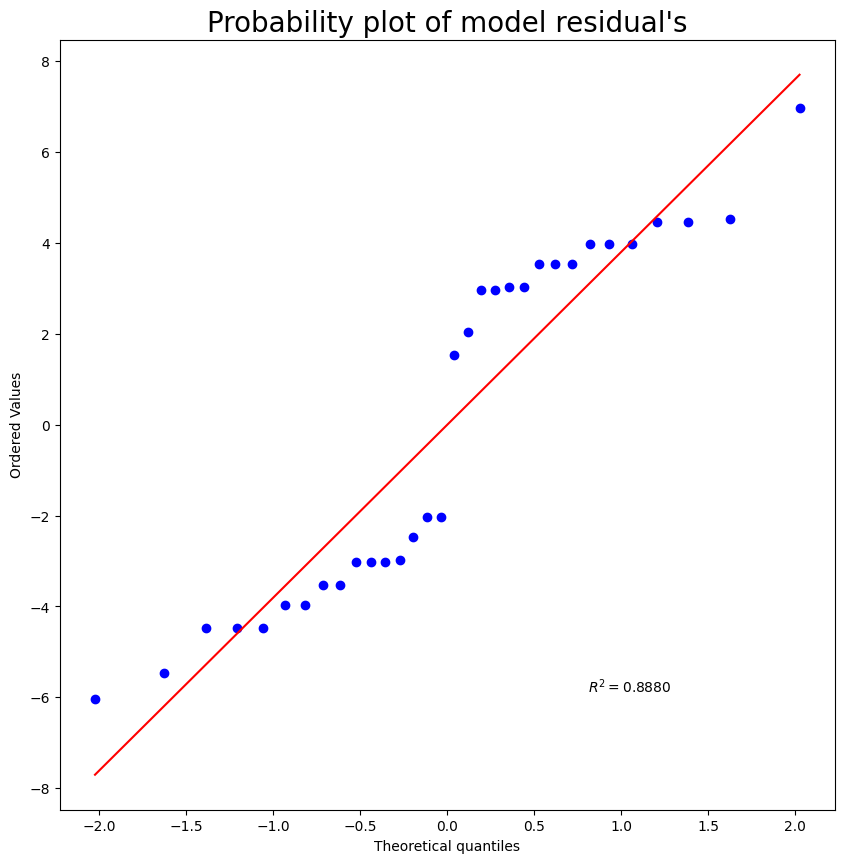

In [81]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()